# Exchange rate of Yuan (Chinese currency)

1. See the effect of Exchange rate regime change on Yuan (July 2005).
2. What is the basket of currencies Yuan uses.
3. Does this basket changes with time.

Exchange rate regime: https://en.wikipedia.org/wiki/Exchange_rate_regime#:~:text=An%20exchange%20rate%20regime%20is,and%20the%20foreign%20exchange%20market.



In [32]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [18]:
# import data
# let's import few top  traded currency pairs

start_date='2000-01-01'
end_date="2020-01-30" # ending before pandemic


from pandas_datareader import data
curr_pairs=["DEXCHUS", "DEXJPUS", "DEXKOUS", "DEXMAUS", 
                "DEXUSEU", "DEXUSUK", "DEXTHUS", "DEXSZUS"]
fx = data.DataReader(curr_pairs, 'fred',start=start_date)


In [19]:
fx.shape

(5870, 8)

In [20]:
fx.columns

Index(['DEXCHUS', 'DEXJPUS', 'DEXKOUS', 'DEXMAUS', 'DEXUSEU', 'DEXUSUK',
       'DEXTHUS', 'DEXSZUS'],
      dtype='object')

In [25]:
# null values
print('Null values\n', fx.isna().sum())
# rows with null values
n=fx.isna().any(axis=1) # checks if any col (i.e. axis=1) has Nan value wrt each row
fx[n==True]

Null values
 DEXCHUS    225
DEXJPUS    226
DEXKOUS    226
DEXMAUS    226
DEXUSEU    226
DEXUSUK    226
DEXTHUS    226
DEXSZUS    226
dtype: int64


,DEXCHUS,DEXJPUS,DEXKOUS,DEXMAUS,DEXUSEU,DEXUSUK,DEXTHUS,DEXSZUS
DATE,,,,,,,,
2000-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# drop null values
fx=fx.dropna()

<Figure size 432x288 with 0 Axes>

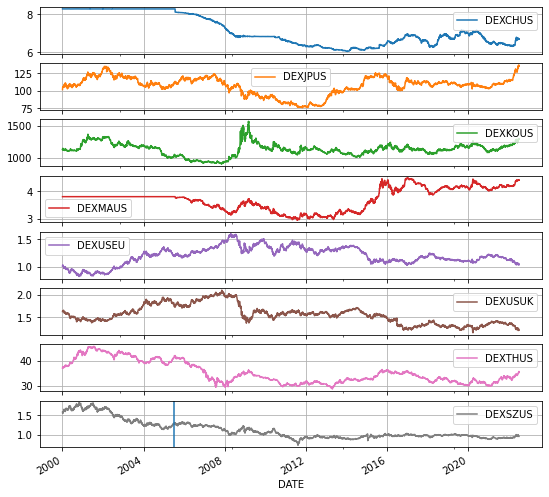

In [48]:
plt.figure()
fx.plot(subplots=True,figsize=(9,9),grid=True)
plt.axvline(x='2005-07-01')# marking the regime day
plt.show()

#### Choosing a base currency

We choose Swiss franc as the base currency. Convert all rates to curr/SZ using DEXSZUS.

In [72]:
fx_sz=pd.DataFrame()
fx_sz[['DEXCHSZ', 'DEXJPSZ', 'DEXKOSZ', 'DEXMASZ', 'DEXTHSZ']]=fx[['DEXCHUS', 'DEXJPUS', 'DEXKOUS', 'DEXMAUS', 'DEXTHUS']].divide(fx['DEXSZUS'],axis=0)

In [84]:
fx_sz[['DEXEUSZ' , 'DEXUKSZ']]=(1/fx[['DEXUSEU' , 'DEXUSUK']]).divide(fx['DEXSZUS'],axis=0)
fx_sz[ 'DEXUSSZ']=1/fx[ 'DEXSZUS']

In [86]:
fx_sz.head()

,DEXCHSZ,DEXJPSZ,DEXKOSZ,DEXMASZ,DEXTHSZ,DEXEUSZ,DEXUKSZ,DEXUSSZ
DATE,,,,,,,,
2000-01-03,5.237728,64.334514,713.562753,2.403846,23.386893,0.622936,0.388808,0.632591
2000-01-04,5.319563,66.231931,721.169290,2.441375,23.854802,0.623210,0.392466,0.642467
2000-01-05,5.332861,66.836275,731.031818,2.447507,23.895401,0.623204,0.392373,0.644081
2000-01-06,5.327992,67.689833,737.773488,2.445302,24.208494,0.623306,0.390592,0.643501
2000-01-07,5.299494,67.317417,728.413237,2.432311,23.875056,0.621801,0.390675,0.640082


<Figure size 432x288 with 0 Axes>

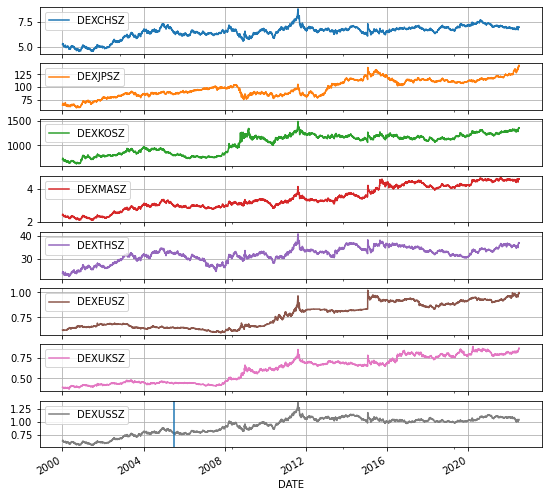

In [87]:
plt.figure()
fx_sz.plot(subplots=True,figsize=(9,9),grid=True)
plt.axvline(x='2005-07-01')# marking the regime day
plt.show()

### Linear regression on currency returns

* Take log returns, $log(p_{i+1}/p_i)$ of currency fx rates wrt swiss franc
* Divide df based on dates of regime change
* Put Yuan/SZ as Y, other rates as X, fit lm

In [89]:
fx_log_ret=np.log(fx_sz).diff().dropna()
fx_log_ret

,DEXCHSZ,DEXJPSZ,DEXKOSZ,DEXMASZ,DEXTHSZ,DEXEUSZ,DEXUKSZ,DEXUSSZ
DATE,,,,,,,,
2000-01-04,0.015503,0.029066,0.010604,0.015491,0.019810,0.000440,0.009364,0.015491
2000-01-05,0.002497,0.009083,0.013583,0.002509,0.001700,-0.000010,-0.000236,0.002509
2000-01-06,-0.000913,0.012690,0.009180,-0.000901,0.013018,0.000164,-0.004550,-0.000901
2000-01-07,-0.005363,-0.005517,-0.012768,-0.005327,-0.013869,-0.002417,0.000212,-0.005327
2000-01-10,-0.005171,-0.004126,-0.009133,-0.005171,-0.005976,-0.001083,-0.004561,-0.005171
...,...,...,...,...,...,...,...,...
2022-06-27,0.002197,0.002179,-0.007796,0.002451,-0.000658,-0.003983,-0.000721,0.001883
2022-06-28,0.001297,0.005596,0.001834,-0.002756,-0.007495,0.005085,0.007314,-0.001256
2022-06-29,0.001214,0.004577,0.008646,0.002758,0.003441,0.007729,0.006328,0.002303


<Figure size 432x288 with 0 Axes>

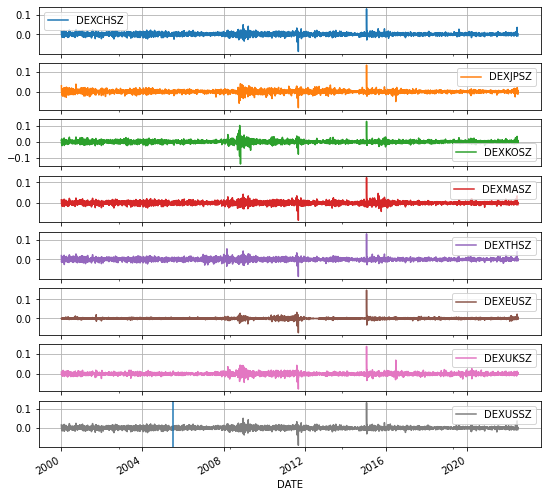

In [90]:
plt.figure()
fx_log_ret.plot(subplots=True,figsize=(9,9),grid=True)
plt.axvline(x='2005-07-01')# marking the regime day
plt.show()

In [100]:
# first we model on dates before regime change

change_date='2005-06-30'
regime1=fx_log_ret.loc[start_date:change_date]
regime1.head(3)

,DEXCHSZ,DEXJPSZ,DEXKOSZ,DEXMASZ,DEXTHSZ,DEXEUSZ,DEXUKSZ,DEXUSSZ
DATE,,,,,,,,
2000-01-04,0.015503,0.029066,0.010604,0.015491,0.019810,0.000440,0.009364,0.015491
2000-01-05,0.002497,0.009083,0.013583,0.002509,0.001700,-0.000010,-0.000236,0.002509
2000-01-06,-0.000913,0.012690,0.009180,-0.000901,0.013018,0.000164,-0.004550,-0.000901


In [105]:
# lm model
x=regime1.iloc[:,1:]
y=regime1.iloc[:,0]

import statsmodels.api as sm
from statsmodels.api import OLS

x_i=sm.add_constant(x) # to get intercept
model=OLS(y,x)
result=model.fit() # use this for diagnostics
result.summary()

C:\Users\prano\anaconda3\envs\finance\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                DEXCHSZ   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.535e+06
Date:                Fri, 08 Jul 2022   Prob (F-statistic):                        0.00
Time:                        20:08:13   Log-Likelihood:                          11117.
No. Observations:                1382   AIC:                                 -2.222e+04
Df Residuals:                    1375   BIC:                                 -2.218e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DEXJPSZ        0.0001      0.000      0.287      0.774      -0.001       0.001
DEXKOSZ       -0.0010      0.000     -1.931      0.054      -0.002    1.52e-05
DEXMASZ       -0.0212      0.148     -0.143      0.886      -0.312       0.270
DEXTHSZ       -0.0006      0.001     -0.764      0.445      -0.002       0.001
DEXEUSZ       -0.0002      0.001     -0.235      0.814      -0.002       0.002
DEXUKSZ     -9.36e-05      0.001     -0.166      0.868      -0.001       0.001
DEXUSSZ        1.0227      0.148      6.890      0.000       0.731       1.314
==============================================================================
Omnibus:                      611.680   Durbin-Watson:                   2.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           524016.710
Skew:                           0.484   Prob(JB):                         0.00
Kurtosis:                      98.390   Cond. No.                     1.50e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### pre regime change inferences
Only the US rate matters. Expected. As the Yuan was pegged to USD.

In [130]:
# lm on annual data post regime change
annual_start_date=pd.to_datetime(change_date)
while annual_start_date<pd.to_datetime(end_date):
    annual_end_date=annual_start_date+pd.Timedelta(360,'days')
    regime=fx_log_ret.loc[annual_start_date:annual_end_date]
    x=regime.iloc[:,1:]
    y=regime.iloc[:,0]

    x_i=sm.add_constant(x) # to get intercept
    model=OLS(y,x)
    result=model.fit() # use this for diagnostics
    print(' ')
    print('annual_start_date',annual_start_date)
    print('annual_end_date',annual_end_date)
    print(result.summary())
    annual_start_date=annual_end_date

C:\Users\prano\anaconda3\envs\finance\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\prano\anaconda3\envs\finance\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\prano\anaconda3\envs\finance\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\prano\anaconda3\envs\finance\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\prano\anaconda3\envs\financ

 
annual_start_date 2005-06-30 00:00:00
annual_end_date 2006-06-25 00:00:00
                                 OLS Regression Results                                
Dep. Variable:                DEXCHSZ   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              798.8
Date:                Fri, 08 Jul 2022   Prob (F-statistic):                   2.37e-162
Time:                        21:31:57   Log-Likelihood:                          1295.8
No. Observations:                 247   AIC:                                     -2578.
Df Residuals:                     240   BIC:                                     -2553.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

C:\Users\prano\anaconda3\envs\finance\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\prano\anaconda3\envs\finance\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\prano\anaconda3\envs\finance\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\prano\anaconda3\envs\finance\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\prano\anaconda3\envs\financ

#### inference post regime 

We see that currencies other than USD start to play a role as predictors of CHSZ rate. This implies that China uses a basket of currencies. As expected. These currency fx rates are are- MASZ, KOSZ, THSZ- in order of annual occurences.